              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
68768  17-06-2020 23:45   4135001  iCRJl6heRkivqQ3       0.0       0.0   
68769  17-06-2020 23:45   4135001  ih0vzX44oOqAx2f       0.0       0.0   
68770  17-06-2020 23:45   4135001  pkci93gMrogZuBj       0.0       0.0   
68771  17-06-2020 23:45   4135001  rGa61gmuvPhdLxV       0.0       0.0   
68772  17-06-2020 23:45   4135001  sjndEbLyjtCKgGv       0.0       0.0   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
68768     5957.000    7426263.0  
68769     5758.000    6426129.0  
68770     5952.000    7415430.0  
68771     5950.000    7356897.0  
68772     5887.

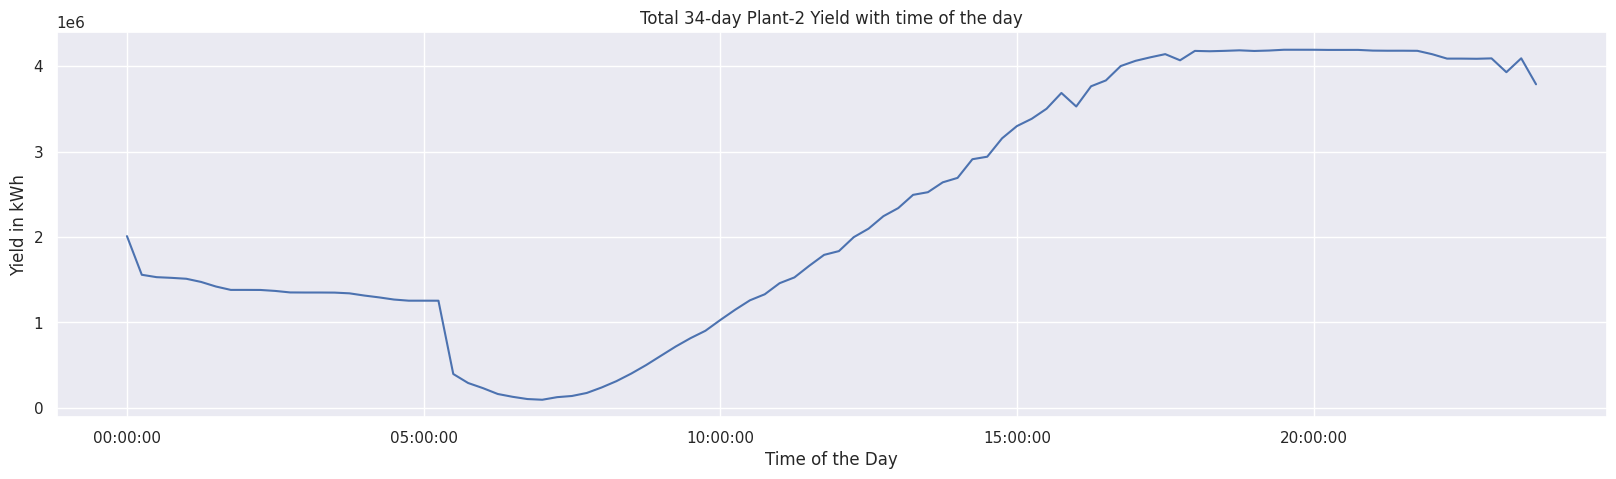

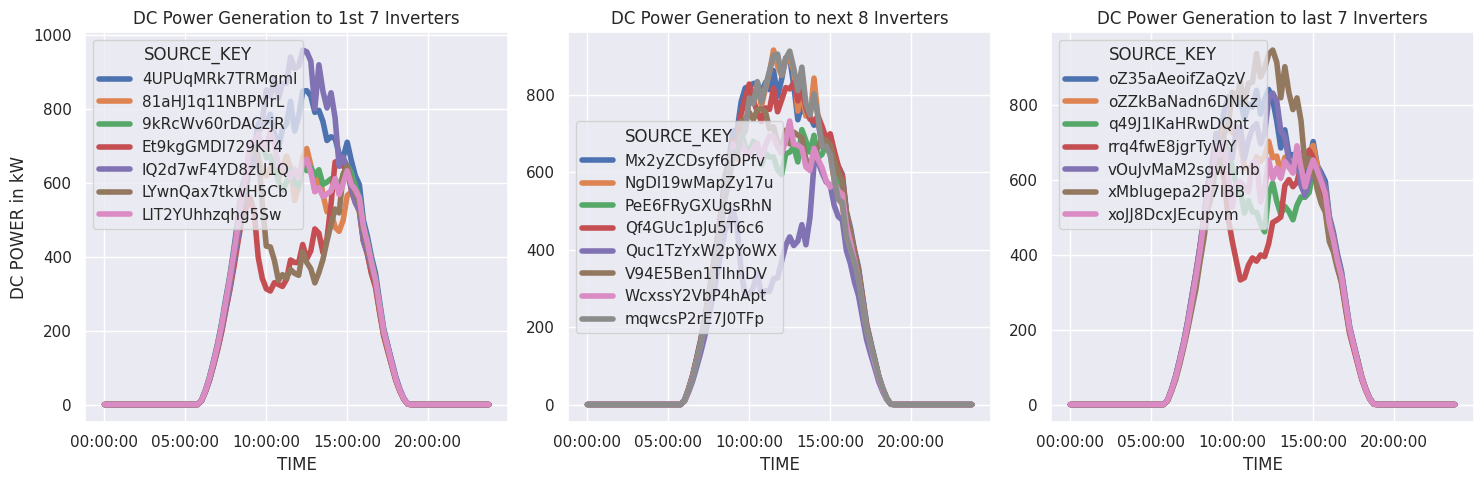

SOURCE_KEY
4UPUqMRk7TRMgml    97.773752
81aHJ1q11NBPMrL    97.804136
9kRcWv60rDACzjR    97.804546
Et9kgGMDl729KT4    97.874887
IQ2d7wF4YD8zU1Q    97.781261
Name: Inv_Efficiency, dtype: float64


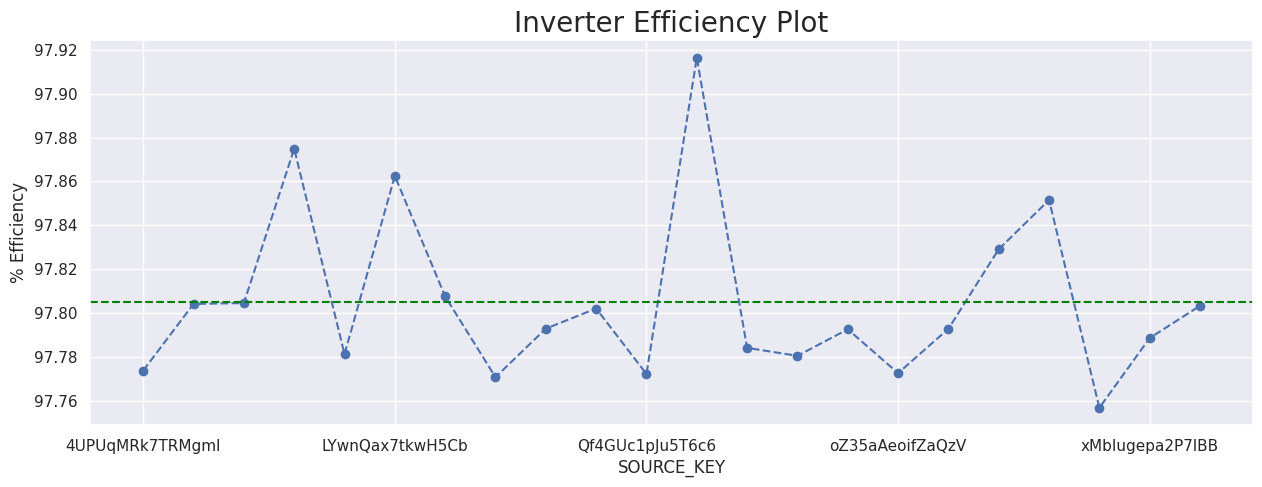

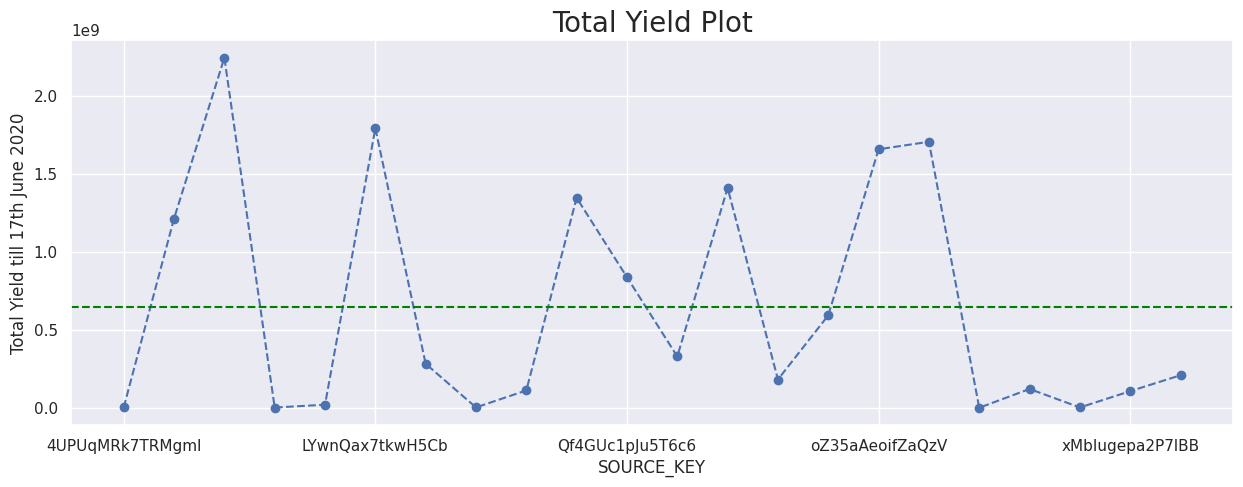

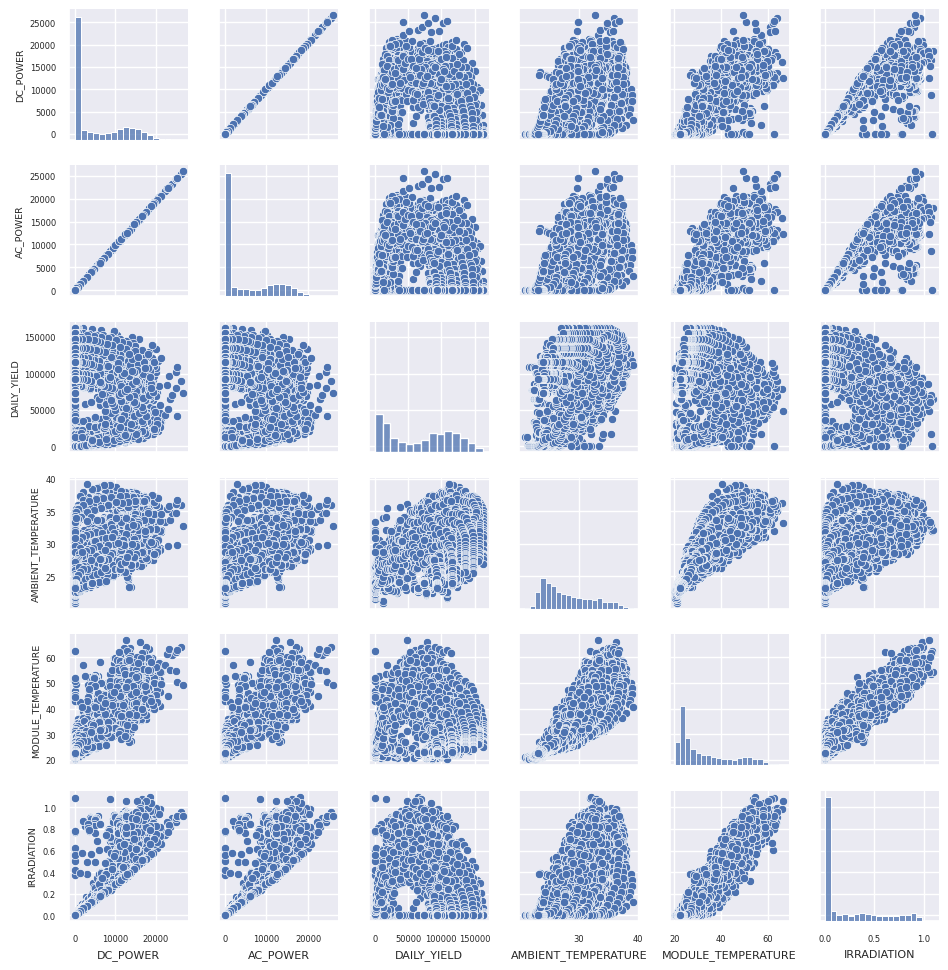

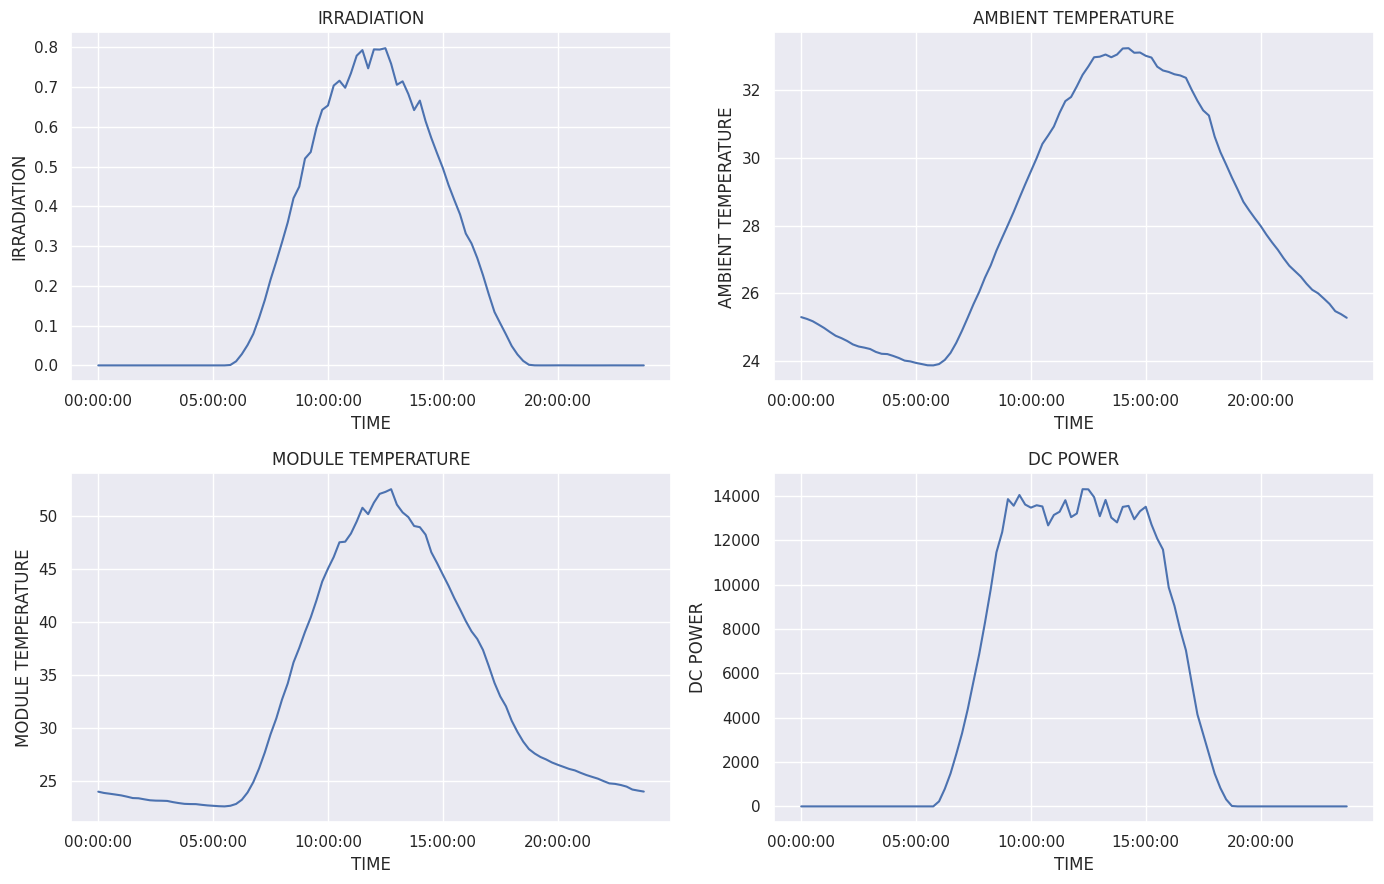

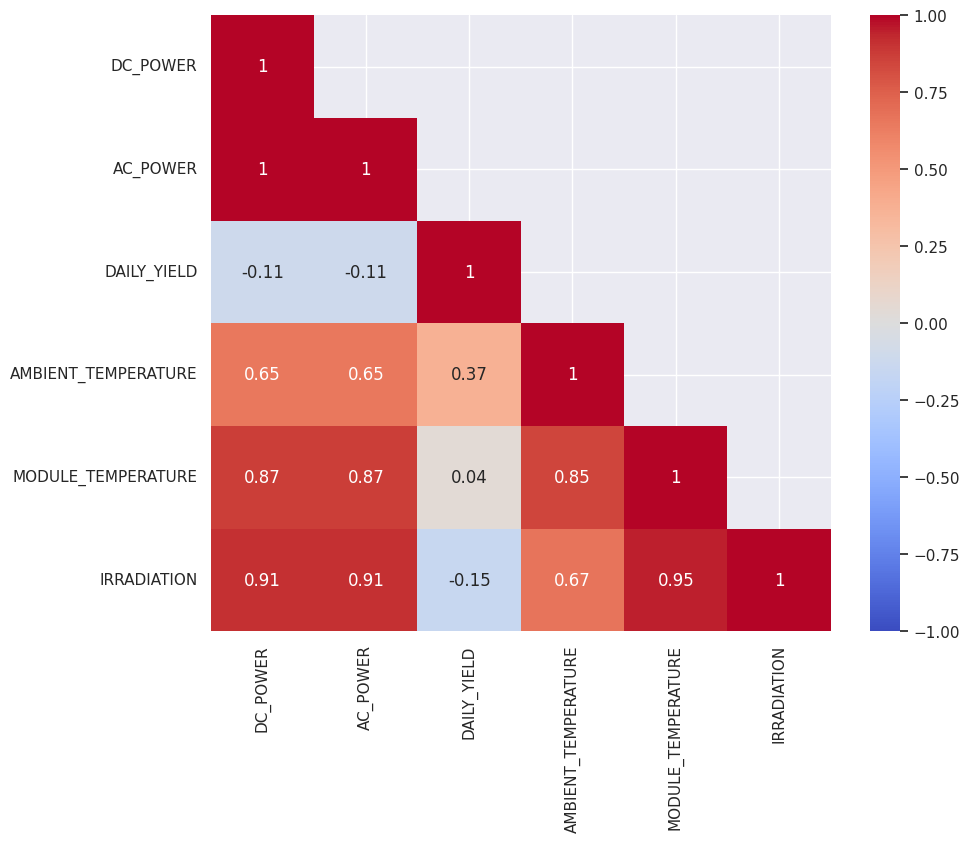

(2607, 2) (2607,)
(652, 2) (652,)
R2 for Train dataset: 0.8314668030280858   MSE for Train dataset: 6819404.040207635
R2 for Test dataset: 0.8382401882739248   MSE for Test dataset: 6063447.16515044
Slope: [17448.79978157   120.18776202]
Intercept: -2403.938192922552
   DATE_TIME  PLANT_ID_gen   SOURCE_KEY_gen  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15       4136001  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1 2020-05-15       4136001  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2 2020-05-15       4136001  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3 2020-05-15       4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4 2020-05-15       4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD    DATE_gen  TIME_gen  PLANT_ID_weather SOURCE_KEY_weather  \
0  2.429011e+06  2020-05-15  00:00:00           4136001    iq8k7ZNt4Mwm3w0   
1  1.215279e+09  2020-05-15  00:00:00           4136001    iq8k7ZNt4Mwm3w0   
2  2.247720e+09  

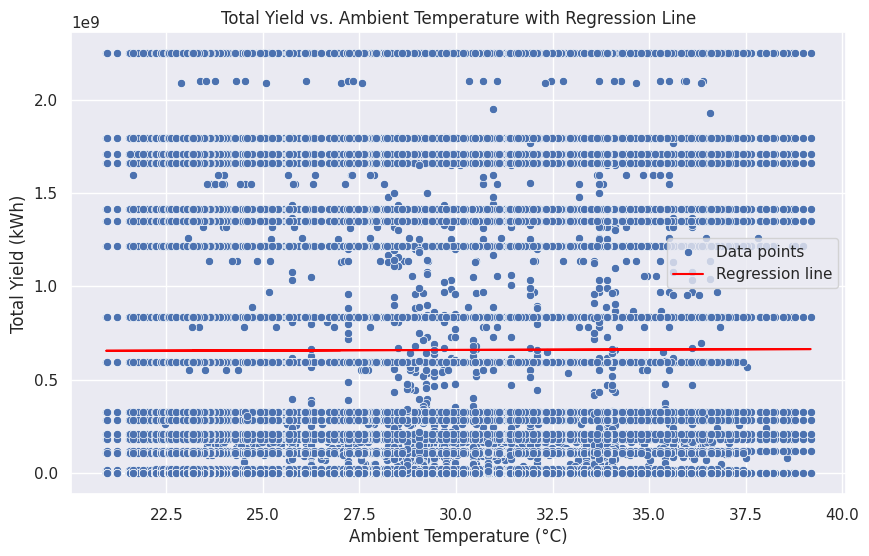

Intercept: 644856188.3121923
Coefficient: 503402.39616964536


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

sns.set(color_codes=True)

# Load the datasets
p1gd = pd.read_csv("Plant_1_Generation_Data.csv")
p2gd = pd.read_csv("Plant_2_Generation_Data.csv")
p1wd = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
p2wd = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

# Print the data for initial inspection
print(p1gd.tail(10))
print(p1gd.head())
print(p2gd.head())
print(p1wd.head())
print(p2wd.head())
print("\n")
print(p1gd.shape)
print(p1wd.shape)
print(p2gd.shape)
print(p2wd.shape)
print("\n")
print(p1gd.describe())
print("\n")
print(p1wd.describe())
print("\n")
print(p2gd.describe())
print("\n")
print(p2wd.describe())
print("\n")

# Check for null values
print(p1wd.isnull().sum())
print("\n")
print(p1gd.isnull().sum())
print("\n")
print(p2wd.isnull().sum())
print("\n")
print(p2gd.isnull().sum())

print("\t \t \t")
print(p1gd.info())
print("\n")
print(p2gd['SOURCE_KEY'].unique())
print("\n")
print(len(p2gd['SOURCE_KEY'].unique()))
print("\n")
print(p2wd['SOURCE_KEY'].unique())
print("\n")
print(p2gd['PLANT_ID'].unique())
print("\n")
print(p2wd['PLANT_ID'].unique())

# Convert DATE_TIME to datetime and extract DATE and TIME
p2gd['DATE_TIME'] = pd.to_datetime(p2gd['DATE_TIME'], format='%d-%m-%Y %H:%M')
p2wd['DATE_TIME'] = pd.to_datetime(p2wd['DATE_TIME'], format='%d-%m-%Y %H:%M')
p2gd['DATE'] = p2gd['DATE_TIME'].apply(lambda x: x.date())
p2gd['TIME'] = p2gd['DATE_TIME'].apply(lambda x: x.time().strftime('%H:%M:%S'))
p2wd['DATE'] = p2wd['DATE_TIME'].apply(lambda x: x.date())
p2wd['TIME'] = p2wd['DATE_TIME'].apply(lambda x: x.time().strftime('%H:%M:%S'))

# Print to confirm the changes
print(p2gd.tail())
print("\n")

numerical_columns = p2gd.select_dtypes(include='number').columns
p2gd_time_grp = p2gd.groupby(['TIME'])[numerical_columns].sum()
print(p2gd_time_grp)

# Plot the DAILY_YIELD with time of the day
p2gd_time_grp['DAILY_YIELD'].plot(figsize=(20, 5))
plt.title('Total 34-day Plant-2 Yield with time of the day')
plt.ylabel('Yield in kWh')
plt.xlabel('Time of the Day')
plt.show()

p2_dc_pwr = p2gd.copy()
p2_dc_pwr = p2_dc_pwr.groupby(['TIME', 'SOURCE_KEY'])['DC_POWER'].mean().unstack()

# Plot the data
fig, ax = plt.subplots(ncols=3, nrows=1, dpi=100, figsize=(15, 5))

ax[0].set_title('DC Power Generation to 1st 7 Inverters')
ax[1].set_title('DC Power Generation to next 8 Inverters')
ax[2].set_title('DC Power Generation to last 7 Inverters')
ax[0].set_ylabel('DC POWER in kW')

# Plot the DC Power for different groups of inverters
p2_dc_pwr.iloc[:, 0:7].plot(ax=ax[0], linewidth=4)
p2_dc_pwr.iloc[:, 7:15].plot(ax=ax[1], linewidth=4)
p2_dc_pwr.iloc[:, 15:22].plot(ax=ax[2], linewidth=4)
# Improve layout and display the plot
plt.tight_layout()
plt.show()

# Group by SOURCE_KEY and calculate mean for numerical columns
p2gd_Inv_grp = p2gd.groupby('SOURCE_KEY')[numerical_columns].mean()

# Calculate Inverter Efficiency
p2gd_Inv_grp['Inv_Efficiency'] = p2gd_Inv_grp['AC_POWER'] * 100 / p2gd_Inv_grp['DC_POWER']

# Debugging: Check the calculated Inverter Efficiency
print(p2gd_Inv_grp['Inv_Efficiency'].head())

# Plot Inverter Efficiency
p2gd_Inv_grp['Inv_Efficiency'].plot(figsize=(15, 5), style='o--')
plt.axhline(p2gd_Inv_grp['Inv_Efficiency'].mean(), linestyle='--', color='green')
plt.title('Inverter Efficiency Plot', size=20)
plt.ylabel('% Efficiency')
plt.show()

p2gd_Inv_tyld = p2gd.groupby('SOURCE_KEY')[numerical_columns].max()

p2gd_Inv_tyld['TOTAL_YIELD'].plot(figsize=(15,5), style='o--')
plt.axhline(p2gd_Inv_tyld['TOTAL_YIELD'].mean(),linestyle='--',color='green')
plt.title('Total Yield Plot', size=20)
plt.ylabel('Total Yield till 17th June 2020')
plt.show()

p2_ac_pwr = p2gd.copy()
p2_ac_pwr = p2_ac_pwr.groupby(['TIME', 'DATE'])['AC_POWER'].sum().unstack()

fig, ax = plt.subplots(ncols=3, nrows=3, dpi=50, figsize=(15, 15))
ax[0, 0].set_title('Plant-2 Output Day-1 to 4')
ax[0, 1].set_title('Plant-2 Output Day-5 to 8')
ax[0, 2].set_title('Plant-2 Output Day-9 to 12')
ax[1, 0].set_title('Plant-2 Output Day-13 to 16')
ax[1, 1].set_title('Plant-2 Output Day-17 to 20')
ax[1, 2].set_title('Plant-2 Output Day-21 to 24')
ax[2, 0].set_title('Plant-2 Output Day-25 to 28')
ax[2, 1].set_title('Plant-2 Output Day-29 to 32')
ax[2, 2].set_title('Plant-2 Output Day-33 to 34')

ax[0, 0].set_ylabel('AC Power Output in kW')
ax[1, 0].set_ylabel('AC Power Output in kW')
ax[2, 0].set_ylabel('AC Power Output in kW')

p2_ac_pwr.iloc[:,0:4].plot(ax=ax[0,0], linewidth = 2)
p2_ac_pwr.iloc[:,4:8].plot(ax=ax[0,1], linewidth = 2)
p2_ac_pwr.iloc[:,8:12].plot(ax=ax[0,2], linewidth = 2)
p2_ac_pwr.iloc[:,12:16].plot(ax=ax[1,0], linewidth = 2)
p2_ac_pwr.iloc[:,16:20].plot(ax=ax[1,1], linewidth = 2)
p2_ac_pwr.iloc[:,20:24].plot(ax=ax[1,2], linewidth = 2)
p2_ac_pwr.iloc[:,24:28].plot(ax=ax[2,0], linewidth = 2)
p2_ac_pwr.iloc[:,28:32].plot(ax=ax[2,1], linewidth = 2)
p2_ac_pwr.iloc[:,32:].plot(ax=ax[2,2], linewidth = 2)
plt.show()
print("\n")
p2gd_DT = p2gd.groupby(['DATE_TIME'],as_index=False)[numerical_columns].sum()
print(p2gd_DT)

p2gd_DT_Select = p2gd_DT[['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD']]
print(p2gd_DT_Select)

p2wd_drp = p2wd.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
print(p2wd_drp)

merged_data = pd.merge(p2gd_DT_Select, p2wd_drp, how='inner', on='DATE_TIME')
print(merged_data.iloc[25:35])

g = sns.pairplot(merged_data[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']])
g.fig.set_size_inches(10, 10)
plt.tight_layout()
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=6.8)
    ax.tick_params(axis='both', which='major', labelsize=6)
plt.show()

merged_data_Irr = merged_data.copy()

numeric_columns = merged_data_Irr.select_dtypes(include=['number']).columns
merged_data_Irr_t = merged_data_Irr.groupby(['TIME'])[numeric_columns].mean()

fig, ax = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(14, 9))

merged_data_Irr_t['IRRADIATION'].plot(ax=ax[0, 0], title='IRRADIATION')
merged_data_Irr_t['AMBIENT_TEMPERATURE'].plot(ax=ax[0, 1], title='AMBIENT TEMPERATURE')
merged_data_Irr_t['MODULE_TEMPERATURE'].plot(ax=ax[1, 0], title='MODULE TEMPERATURE')
merged_data_Irr_t['DC_POWER'].plot(ax=ax[1, 1], title='DC POWER')

ax[0, 0].set_ylabel('IRRADIATION')
ax[0, 1].set_ylabel('AMBIENT TEMPERATURE')
ax[1, 0].set_ylabel('MODULE TEMPERATURE')
ax[1, 1].set_ylabel('DC POWER')

plt.tight_layout()
plt.show()

merged_data_num = merged_data[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
corr = merged_data_num.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(round(corr, 2), annot=True, mask=np.triu(corr, k=1), cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
plt.show()

data_reg = merged_data[['AC_POWER','IRRADIATION','AMBIENT_TEMPERATURE']]

y= data_reg['AC_POWER']
X=data_reg[['IRRADIATION','AMBIENT_TEMPERATURE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
pred_y_train = lm.predict(X_train)
pred_y_test = lm.predict(X_test)

R2_train = r2_score(y_train, pred_y_train)
mse_train = mean_squared_error(y_train, pred_y_train)
print('R2 for Train dataset:', R2_train, '  '   'MSE for Train dataset:', mse_train)

R2_test = r2_score(y_test, pred_y_test)
mse_test = mean_squared_error(y_test, pred_y_test)
print('R2 for Test dataset:', R2_test, '  '   'MSE for Test dataset:', mse_test)

print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)

# Convert DATE_TIME to datetime
p2gd['DATE_TIME'] = pd.to_datetime(p2gd['DATE_TIME'], format='%d-%m-%Y %H:%M')
p2wd['DATE_TIME'] = pd.to_datetime(p2wd['DATE_TIME'], format='%d-%m-%Y %H:%M')

# Merge generation data with weather sensor data
merged_data = pd.merge(p2gd, p2wd, on='DATE_TIME', suffixes=('_gen', '_weather'))

# Check the merged data
print(merged_data.head())

# Extract the required columns
data_for_regression = merged_data[['TOTAL_YIELD', 'AMBIENT_TEMPERATURE']].dropna()

# Perform regression
X = data_for_regression['AMBIENT_TEMPERATURE'].values.reshape(-1, 1)
y = data_for_regression['TOTAL_YIELD'].values

reg = LinearRegression().fit(X, y)
predicted_y = reg.predict(X)

# Plot the data with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMBIENT_TEMPERATURE', y='TOTAL_YIELD', data=data_for_regression, label='Data points')
plt.plot(data_for_regression['AMBIENT_TEMPERATURE'], predicted_y, color='red', label='Regression line')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Total Yield (kWh)')
plt.title('Total Yield vs. Ambient Temperature with Regression Line')
plt.legend()
plt.show()

# Print the regression coefficients
print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_[0]}")